# Learning Points & Summary

In this lesson we looked at how to:

* use HTML Markdown in Notebooks, such as section headings # and how to embed images with the <img> tag.

* combine the groupby() and count() functions to aggregate data

* use the .value_counts() function

* slice DataFrames using the square bracket notation e.g., df[:-2] or df[:10]

* use the .agg() function to run an operation on a particular column

* rename() columns of DataFrames

* create a line chart with two separate axes to visualise data that have different scales.

* create a scatter plot in Matplotlib

* work with tables in a relational database by using primary and foreign keys

* .merge() DataFrames along a particular column

* create a bar chart with Matplotlib




# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [1]:
import pandas as pd

In [2]:
# mount the drive to the notebook (for access)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
colors_df = pd.read_csv('drive/MyDrive/jupyter/data/74/colors.csv')
colors_df.head(5)

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [4]:
# unique colors
total_colors = colors_df.rgb.nunique()
total_colors

124

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [5]:
# are transparent vs. non-transparent (opaque)
colors_df.value_counts(colors_df.is_trans)

is_trans
f    107
t     28
dtype: int64

In [6]:
# way 2: find the number of transparent colors
colors_df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


**Challenge**: Change this into an h3 section heading:

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

<img src=https://i.imgur.com/aKcwkSx.png/>

A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png

<img src=https://i.imgur.com/whB1olq.png/>

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows.

In [7]:
sets_df = pd.read_csv("drive/MyDrive/jupyter/data/74/sets.csv")
sets_df.head(5)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [8]:
print(sets_df.info())
print(sets_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15710 entries, 0 to 15709
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    15710 non-null  object
 1   name       15710 non-null  object
 2   year       15710 non-null  int64 
 3   theme_id   15710 non-null  int64 
 4   num_parts  15710 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 613.8+ KB
None
               year      theme_id     num_parts
count  15710.000000  15710.000000  15710.000000
mean    2004.532718    387.167664    166.036346
std       13.994785    201.270250    369.689195
min     1949.000000      1.000000      0.000000
25%     1998.000000    206.000000      9.000000
50%     2009.000000    443.000000     45.000000
75%     2015.000000    524.000000    165.000000
max     2021.000000    709.000000   9987.000000


In [9]:
print(sets_df.theme_id.nunique())

571


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [10]:
# find the lowest year for a set
sets_df.year.min()

1949

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [11]:
# sets_df.filter(sets_df.year == 1949) -- returns No results (interesting)
sets_df[sets_df.year == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [12]:
# get the count of the different sets
earliest_sets = sets_df[sets_df.year == 1949]
earliest_sets.set_num.nunique()

5

**Challenge**: Find the top 5 LEGO sets with the most number of parts.

In [13]:
# I can sort by max number of parts, then get the head(5)
# If you want unique sets, then sort, then filter by unique
num_parts_sorted = sets_df.num_parts.sort_values(ascending=False)
sets_df.sort_values('num_parts', ascending=False).head(8)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922
11471,75978-1,Diagon Alley,2020,246,5547
15612,SWMP-1,Star Wars / M&M Mosaic - Promo Set,2005,158,5462
1689,2000409-1,Window Exploration Bag,2010,507,5200


In [14]:
# let's find the dataframe with only the unique parts
# unique set numbers with the highest num_parts
top5_unique_sets = sets_df.nlargest(5, 'num_parts')
top5_unique_sets

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [15]:
# select only two columns
top5_unique_sets[['set_num', 'num_parts']]

,set_num,num_parts
15004,BIGBOX-1,9987
11183,75192-1,7541
10551,71043-1,6020
295,10256-1,5923
221,10189-1,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [16]:
yearly_grouped = sets_df.groupby('year').count()
yearly_grouped

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


In [17]:
# returns the indices of the table
from typing import List, Dict
years: List = yearly_grouped.index
years

Int64Index([1949, 1950, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
            1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
            1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
            1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
            1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='year')

In [18]:
# resetting the index to convert the index into a column
# basically converts the index into a column
yearly_grouped = yearly_grouped.reset_index()
yearly_grouped.head(4)

,year,set_num,name,theme_id,num_parts
0,1949,5,5,5,5
1,1950,6,6,6,6
2,1953,4,4,4,4
3,1954,14,14,14,14


In [19]:
# compare set_num with between year 1955 and 2019
set_num_1955 = yearly_grouped[yearly_grouped.year == 1955]
print(set_num_1955)
set_num_2019 = yearly_grouped[yearly_grouped.year == 2019]
print(set_num_2019)

# set_num_2019.set_num gives a list for all the set_num values within the
# dataframe. set_num_2019.set_num.values, returns a list [] with the set_num
# values for the rows in the dataframe. In this case, we know the year is a unique
# index so the result with the .values property will be [<one item>]
print(f"2019 set_num value: {set_num_2019.set_num.values[0]}")
difference = set_num_2019.set_num.values[0] - set_num_1955.set_num.values[0]
print(f"The difference is: {difference}")

   year  set_num  name  theme_id  num_parts
4  1955       28    28        28         28
    year  set_num  name  theme_id  num_parts
68  2019      840   840       840        840
2019 set_num value: 840
The difference is: 812


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames.

In [23]:
import matplotlib.pyplot as plt

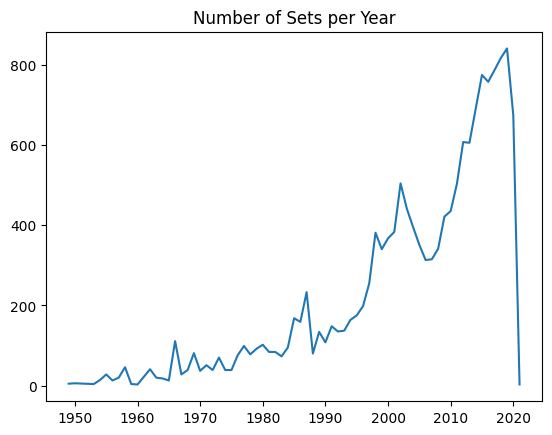

In [25]:
# set up the plot
plt.title("Number of Sets per Year")

plt.plot(yearly_grouped.year, yearly_grouped.set_num)

    year  set_num  name  theme_id  num_parts
67  2018      816   816       816        816
68  2019      840   840       840        840
    year  set_num  name  theme_id  num_parts
69  2020      674   674       674        674
70  2021        3     3         3          3

 



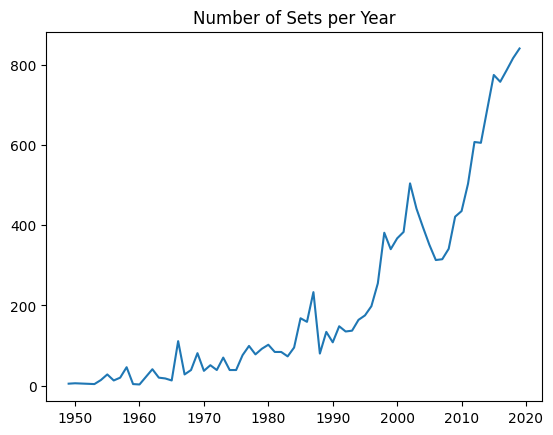

In [29]:
# the last two years have no data, that is why the collapse in the chart (let's remove them)
plt.title("Number of Sets per Year")

# get the last two rows removed
print(yearly_grouped.iloc[:-2].tail(2))
print(yearly_grouped.tail(2))
print("\n \n")

# final plot with cleaned data (slices the DataFrame)
plt.plot(yearly_grouped.iloc[:-2].year, yearly_grouped.iloc[:-2].set_num)

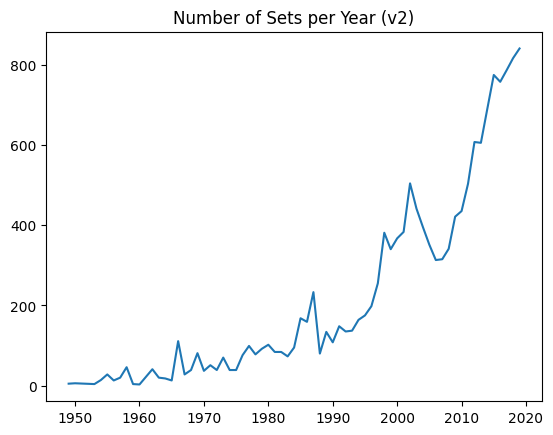

In [31]:
# another way of slicing (slices the Series only)

plt.title("Number of Sets per Year (v2)")
plt.plot(yearly_grouped.year[:-2], yearly_grouped.set_num[:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

Often you find yourself needing to summarise data. This is where the .groupby() function comes in really handy. However, sometimes you want to run even more operations based on a particular DataFrame column. This is where the .agg() method comes in.

In our case, we want to calculate the number of different themes by calendar year. This means we have to group the data by year and then count the number of unique theme_ids for that year.

In [32]:
yearly_grouped.head(5)

,year,set_num,name,theme_id,num_parts
0,1949,5,5,5,5
1,1950,6,6,6,6
2,1953,4,4,4,4
3,1954,14,14,14,14
4,1955,28,28,28,28


In [33]:
"""Aggregating performs specific operations on column.
  Input is a dictionary (columnName: operationPerformed)"""
yearly_grouped.agg({
    "theme_id": pd.Series.nunique
})

theme_id    62
dtype: int64

In [35]:
# this is the same as above, but the best way to use aggregate is to couple with it groupby()
yearly_grouped.theme_id.nunique()

62

In [37]:
themes_by_year = sets_df.groupby("year").agg({
    "theme_id": pd.Series.nunique
})
themes_by_year.head(5)

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [39]:
themes_by_year.rename(columns={"theme_id": "nr_themes"}, inplace=True)
themes_by_year.head(3)

,nr_themes
year,
1949,2
1950,1
1953,2


In [40]:
themes_by_year.tail(3)

,nr_themes
year,
2019,78
2020,82
2021,1


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).

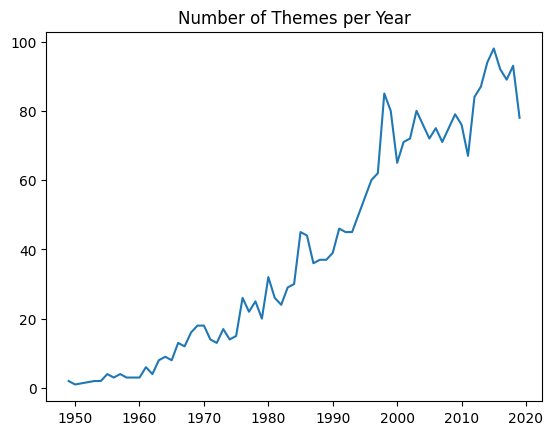

In [43]:
# line plot with number of themes released by year
plt.title("Number of Themes per Year")

# we get the Index (due to the groupby operation), and exclude the last 2 years
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

### Line Charts with Two Seperate Axes

Wouldn't it be nice to have the number of themes and the number sets on the same chart? But what do we get if we just plot both of them the way we have before?

/content/drive/MyDrive/jupyter/data/74/chart-1.jpg

Well, that's not very informative! 🤦‍♀️ The problem is that the "number of themes" and the "number of sets" have very different scales. The theme number ranges between 0 and 90, while the number of sets ranges between 0 and 900. So what can we do?

### Use two Separate Axes

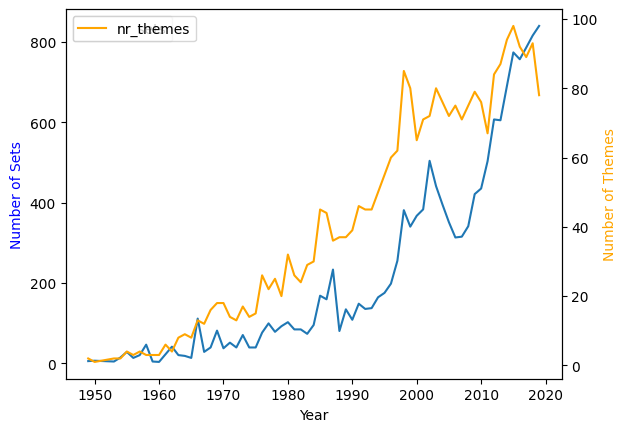

In [48]:
# configure the plot to have 2 different axes
ax1 = plt.gca()   # get the current axes (x-axis)
ax2 = ax1.twinx() # twinx allows ax1 and ax2 to share the same x-axis (i.e. year)

sets_by_year = sets_df.groupby("year").count()

ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], label="nr_sets")
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], color="orange", label="nr_themes")

# configure
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Sets", color="blue")
ax2.set_ylabel("Number of Themes", color="orange")

ax1.legend()
ax2.legend()

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [55]:
# complexity over time (how more complex lego's have become)
# we want the average number of parts of each set per year (year = x-axis, avg_num_sets = values)
sets_df.head(3)
parts_per_set = sets_df.groupby('year').agg({
    'num_parts': pd.Series.mean
})

# display only 2 decimals for floats
pd.options.display.float_format = '{:,.2f}'.format
parts_per_set

,num_parts
year,
1949,99.60
1950,1.00
1953,13.50
1954,12.36
1955,36.61
...,...
2017,221.84
2018,213.62
2019,207.51


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart?

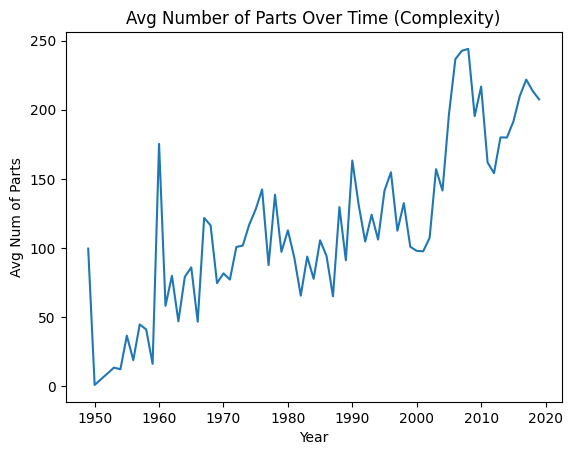

In [58]:
plt.title("Avg Number of Parts Over Time (Complexity)")
plt.xlabel("Year")
plt.ylabel("Avg Num of Parts")

plt.plot(parts_per_set.index[:-2], parts_per_set[:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

In [66]:
sets_df.head(3)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0


In [75]:
# value_counts returns the theme_id : number of counts
# in other words, 158 : 753 (means that theme_id=158, was counted 753 times)
sets_df.theme_id.value_counts()

158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: theme_id, Length: 571, dtype: int64

**Challenge** Use what you know about HTML markup and tags to display the database schema:

<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [76]:
themes = pd.read_csv("/content/drive/MyDrive/jupyter/data/74/themes.csv")
themes

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.00
2,3,Competition,1.00
3,4,Expert Builder,1.00
4,5,Model,1.00
...,...,...,...
591,705,Iron Man,696.00
592,706,Spider-Man,696.00
593,707,X-Men,696.00
594,708,The LEGO Batman Movie,697.00


In [77]:
print(themes.info)
print(themes.describe)
print(themes.shape)

<bound method DataFrame.info of       id                   name  parent_id
0      1                Technic        NaN
1      2         Arctic Technic       1.00
2      3            Competition       1.00
3      4         Expert Builder       1.00
4      5                  Model       1.00
..   ...                    ...        ...
591  705               Iron Man     696.00
592  706             Spider-Man     696.00
593  707                  X-Men     696.00
594  708  The LEGO Batman Movie     697.00
595  709               LEGO Art        NaN

[596 rows x 3 columns]>
<bound method NDFrame.describe of       id                   name  parent_id
0      1                Technic        NaN
1      2         Arctic Technic       1.00
2      3            Competition       1.00
3      4         Expert Builder       1.00
4      5                  Model       1.00
..   ...                    ...        ...
591  705               Iron Man     696.00
592  706             Spider-Man     696.00
593  7

In [78]:
themes[themes.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.00
150,158,Star Wars,NaN
174,209,Star Wars,207.00
211,261,Star Wars,258.00


In [79]:
# from the id = 18 that we get from the themes.csv (we look for the sets that it has)
sets_df[sets_df.theme_id == 18].head(5)

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339


### Merging (i.e., Combining) DataFrames based on a Key

Let's use the .merge() method to combine two separate DataFrames into one. The merge method works on columns with the same name in both DataFrames.

Currently, our theme_ids and our number of sets per theme live inside a Series called set_theme_count.

In [81]:
"""The merge method works on columns with the same name in both DataFrames."""
set_count = sets_df.theme_id.value_counts()
print(set_count.head(3))
print(type (set_count))

158    753
501    656
494    398
Name: theme_id, dtype: int64
<class 'pandas.core.series.Series'>


In [83]:
# let's convert the Series into a dataframe to merge it with another dataframe (make them same data type)
set_theme_count = pd.DataFrame({
    'id': set_count.index,
    'set_count': set_count.values
})
set_theme_count.head(4)

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356


In [84]:
"""Merge the two dataframes with the SAME COLUMN NAME"""
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df.head(3)

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


<BarContainer object of 10 artists>

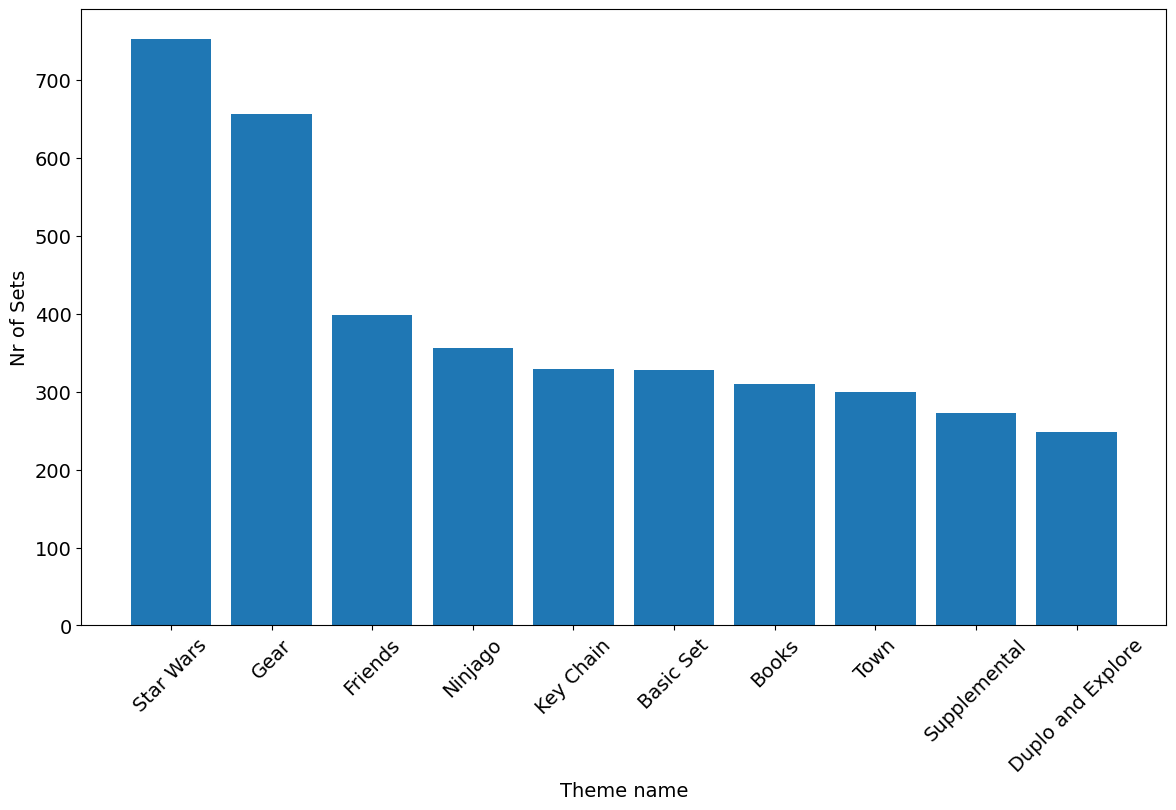

In [85]:
"""Creating a Bar Chart"""
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel("Nr of Sets", fontsize=14)
plt.xlabel("Theme name", fontsize=14)

# we are grabbing the first 10 rows in the DF (which are also the largest set counts)
plt.bar(merged_df.name[:10], merged_df.set_count[:10])


# Learning Points & Summary

In this lesson we looked at how to:

* use HTML Markdown in Notebooks, such as section headings # and how to embed images with the <img> tag.

* combine the groupby() and count() functions to aggregate data

* use the .value_counts() function

* slice DataFrames using the square bracket notation e.g., df[:-2] or df[:10]

* use the .agg() function to run an operation on a particular column

* rename() columns of DataFrames

* create a line chart with two separate axes to visualise data that have different scales.

* create a scatter plot in Matplotlib

* work with tables in a relational database by using primary and foreign keys

* .merge() DataFrames along a particular column

* create a bar chart with Matplotlib

